# KMOOC-9

## 이항분포


scipy.stats.binom.pmf(k, n, p, loc=0) : Probability mass function 

In [110]:
from scipy.stats import binom, hypergeom
import pandas as pd
import numpy as np
%matplotlib inline

#한글 폰트 사용
from matplotlib import font_manager,rc
import matplotlib
font_path = "C:/Windows/Fonts/H2GTRM.TTF"       #폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()   #폰트 이름 얻어오기
matplotlib.rc('font',family=font_name)   #font 설정

### 주사위 세번 던지기: X = 1(앞면) 이 나온 횟수

[0, 1, 2, 3]  - 0회, 1회, 2 회, 3 회

In [18]:
x = range(0,4)
print(x)
binom.pmf(x, 3, 1/6)

range(0, 4)


array([0.5787037 , 0.34722222, 0.06944444, 0.00462963])

In [20]:
binom.pmf(2, 3, 1/6)       # x = 2 (앞면이 두번나온)인 확률

0.06944444444444445

In [26]:
n = 8
p = 0.3
x = range(9)

prob = binom.pmf(x, n, p)
pd.DataFrame(data=prob.T, index=x).transpose()

,0,1,2,3,4,5,6,7,8
0,0.057648,0.19765,0.296475,0.254122,0.136137,0.046675,0.010002,0.001225,0.000066


<BarContainer object of 9 artists>

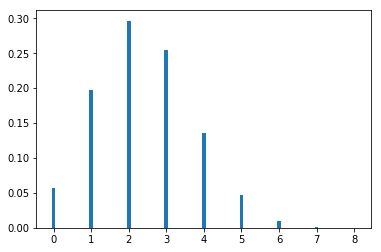

In [30]:
plt.bar(x, prob, width=0.1)

### 항암제 완치율
- 어떤 암에 대한 기존 항암제의 완치율은 50%   
- 어느 제약회사에서 새로운 항암제를 개발하여 항암제의 효과를 확인하기 위해 15명의 환자를 대상으로 임상시험  
- 8 명이 완치될 확률은 ?

In [32]:
binom.pmf(8, 15, 0.5)

0.1963806152343757

- 적어도 10 명이상 치유될 확률은 ?
> P(X>=10) = P(X>9) = 1 - P(X <= 9)

cdf(k, n, p, loc=0) : Cumulative distribution function.

In [35]:
1 - binom.cdf(9, 15, 0.5, loc=0)

0.1508789062500001

- 환자 중 12명의 환자가 치유되었다면
> 12 이상 치유될 확률

In [37]:
1 - binom.cdf(11, 15, 0.5)

0.017578125

### factorial 계산

In [38]:
import math

math.factorial(171)

1241018070217667823424840524103103992616605577501693185388951803611996075221691752992751978120487585576464959501670387052809889858690710767331242032218484364310473577889968548278290754541561964852153468318044293239598173696899657235903947616152278558180061176365108428800000000000000000000000000000000000000000

## 초기하분포

#### scipy.stats.hypergeom

>pmf(x, M, n, N, loc=0) : Probability mass function.

x - 확률변수  
M - M is the total number of objects  
n - 뽑을 갯수  
N - n 이 속하는 N drawn without replacement from the total population

### 6 개가 정상품과 4 개의 불량품이 있는 상자에서 임의로 3개의 제품을 비복원 추출한 경우에 3 개 중 1개가 불량품일 확률 ?

In [82]:
x = 1
M = 10
n = 3
N = 4

hypergeom.pmf(x,  M, n, N)

0.49999999999999994

### 참고: cdf F(X)

In [72]:
hypergeom.cdf(x, M, n, N, loc=0)

0.6666666666666667

### 난수

numpy.random.hypergeometric(ngood, nbad, nsample, size=None)

In [81]:
np.random.hypergeometric(6, 4, 2, size=10)

array([1, 1, 2, 2, 0, 1, 2, 2, 0, 1])

### 품질관리 - Operating Characteristic (OC) curve

- 50 개의 전구들이 들어있는 상자에서 10개의 전구를 무작위로 선택하여 검사  
- 불량전구의 갯수가 1 개 이하이면 이 회사의 전구를 구매  
- 만약 이 상자에 5개의 불량품이 있을 때, 구매할 확룰은 ?
- P(X=0) + P(X=1)


In [86]:
hypergeom.pmf(0, 50, 10, 5) + hypergeom.pmf(1, 50, 10, 5)

0.7418999792331384

- 불량품이 k 개일 때

In [98]:
M = range(0, 50)

prob = hypergeom.pmf(0, 50, 10, M) + hypergeom.pmf(1, 50, 10, M)

In [99]:
prob

array([1.00000000e+00, 1.00000000e+00, 9.63265306e-01, 9.02040816e-01,
       8.25835866e-01, 7.41899979e-01, 6.55632540e-01, 5.70933599e-01,
       4.90502435e-01, 4.16089929e-01, 3.48710312e-01, 2.88817320e-01,
       2.36449344e-01, 1.91347738e-01, 1.53052006e-01, 1.20975238e-01,
       9.44628076e-02, 7.28369820e-02, 5.54298307e-02, 4.16065047e-02,
       3.07807100e-02, 2.24239561e-02, 1.60699416e-02, 1.13152368e-02,
       7.81724693e-03, 5.29027097e-03, 3.50032966e-03, 2.25930369e-03,
       1.41880951e-03, 8.64139955e-04, 5.08509983e-04, 2.87774138e-04,
       1.55719887e-04, 7.99898510e-05, 3.86445921e-05, 1.73455194e-05,
       7.11361188e-06, 2.60322000e-06, 8.20265949e-07, 2.09885282e-07,
       3.90371049e-08, 3.99132494e-09, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

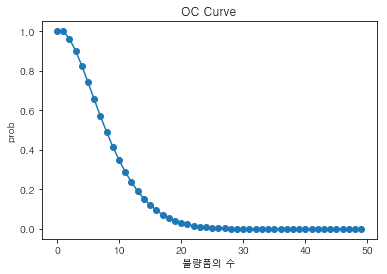

In [111]:
plt.plot(M, prob, '-o')
plt.xlabel('불량품의 수')
plt.ylabel('prob')
plt.title('OC Curve');